In [1]:
library(devtools)
library(metacell)
load_all("../metacell.flow/")
scdb_init("output/scrna_db/",force_reinit = T)
scfigs_init("figs")
scdb_flow_init()

Loading required package: usethis

i Loading metacell.flow

initializing scdb to output/scrna_db/



In [2]:
tgconfig::set_param(param = "mcell_mc2d_max_confu_deg",value = 4, package = "metacell")

In [3]:
library("reticulate")
library("anndata")
sc = import("scanpy")
mc2 = import("metacells")
# metacells <- anndata::read_h5ad('oc_emb_roned.h5ad')
metacells <- anndata::read_h5ad('oc_exe.h5ad')
# metacells <- anndata::read_h5ad('../rabemb_2203/metacells11_2203_woexec_for_mcview_ron.h5ad')

In [4]:
mc_id = "oc_emb"

In [5]:
mat_id = "oc_emb"
mc_id = "oc_emb"

feat_gset = "oc_emb"
mgraph_id = "oc_emb"

In [6]:
mat_id = "oc_embexe"
mc_id = "oc_embexe"
mgraph_id = "oc_exe"

In [7]:
logist_loc = 1
logist_scale = 0.2
logist_eps = 4e-5
max_d_fold = 3

mc = scdb_mc(mc_id)
gset = scdb_gset(feat_gset)
feat_genes = names(gset@gene_set)
# mgraph = mc2d_comp_mgraph_param(mc, feat_genes, logist_loc, logist_scale, logist_eps, max_d_fold)

In [7]:
genes = feat_genes
loc = logist_loc
scale = logist_scale
eps = logist_eps
max_deg = 4
legc = log2(mc@e_gc[genes,] + eps)

logist_d = function(x) {
    d = abs(legc - x)
    d = plogis(d, loc, scale)
    return(colSums(d))
}
a = apply(legc, 2, logist_d)

In [ ]:
"oc_metacell_types-2022-10-12.csv"

In [8]:
oc_mat = scdb_mat(mat_id)
oc_mc = mc
oc_md = oc_mat@cell_metadata
oc_md$cellid = rownames(oc_md)

In [9]:
oc_mc_t = (oc_md %>% left_join(tibble::enframe(oc_mc@mc) %>% rename(cellid=name, mcid=value)) %>% group_by(mcid) %>% summarise(t=mean(developmental_time, na.rm=T)))$t[oc_mc@annots]
names(oc_mc_t) = oc_mc@annots

Joining, by = "cellid"


In [10]:
oc_color_ord = c(
'#FACB12', #PGC
'#f7f79e', #Surface ectoderm
'#CDE087', #Floor plate
'#C3C388', #Neural crest
'#879E86', #Neural plate boundary
'#CDE088', #Neural tube
'#647A4F', #Forebrain/Midbrain/Hindbrain
'#354E23', #Caudal neurectoderm
'#649146', #rostral neurectoderm
'#90BF75', #Ectoderm - Definitive
'#635547', #epiblast
'#DABE99', #Primitive streak
'#9e6762', #caudal epiblast
'#E2F700', #Median TFAP
'#C594BF', #nascent mesoderm
'#1a3f52', #caudal mesoderm
'#45d1c5', #Lateral & intermediate mesoderm
'#408DA1', #Paraxial Mesoderm
'#A8DBF7', #Presomitic mesoderm
'#1AA2EB', #Somitic mesoderm
'#8DB5CE', #rostral mesoderm
'#53f1fc', #Cardiopharyngeal mesoderm
'#B51D8D', #Caridac
'#B6A8ED', #Nascent mesoderm - extraembryonic
'#8870ad', #ExE mesoderm
'#cc7818', #Amnion
'#532C8A', #Allantois
'#A69369', #chorionic mesothelium
'#966F1B', #Endothelial2
'#ff891c', #Endothelial
'#FBBE92', #Hematoendothelial
'#c9a997', #Blood progenitors
'#C72228', #Erythroid1
'#FF5608', #Erythroid2
'#c19f70', #Anterior primitive streak
'#6666ED', #Node
'#0F4A9C', #notochord
'#F397C0', #definitive endoderm
'#EF5A9E', #Gut
'#EF5A9D', #Foregut
'#F25CD4', #Hindgut
'#CF6191', #Hypoblast-Anterior (Hhex/Lhx1/Cer1)
'#F6BFCB', #hypoblast
'#572E48', #Yolk sac
'#050505', #Parietal Endoderm
'#7B00FF', #Dppa3 Hand1
'#00FF15', #Dppa3 low Dusp6 neg
'#FF00B7', #DPPA3 TGM3
'#D4EB63', #Dusp6 not other
'#FFFF00', #Gata2 Hand1
'#FFA600', #Lgals3
'#54DCE3' #Wfdc2 Aldoc
)

oc_col_to_rank = c(1:length(oc_color_ord))
names(oc_col_to_rank) = oc_color_ord
mc_rank = 1000*oc_col_to_rank[oc_mc@colors] + oc_mc_t
oc_mc_ord = order(mc_rank)
oc_mc_ordered = names(oc_mc@colors)[oc_mc_ord]

In [11]:
length(oc_mc@colors)

[1] 3584

In [12]:
updated_annots = fread("oc_metacell_types-2022-10-12.csv")
colors_update = updated_annots$color
names(colors_update) = updated_annots$metacell+1

In [13]:
oc_mc@colors[names(colors_update)] = colors_update

In [14]:
oc_mc@color_key$group = rownames(oc_mc@color_key)
# mm_mc@color_key$group = rownames(mm_mc@color_key)

In [15]:
oc_col2cat = oc_mc@color_key$group
names(oc_col2cat) = oc_mc@color_key$color

# mm_col2cat = mm_mc@color_key$group
# names(mm_col2cat) = mm_mc@color_key$color

oc_cat2col = oc_mc@color_key$color
names(oc_cat2col) = oc_mc@color_key$group

# mm_cat2col = mm_mc@color_key$color
# names(mm_cat2col) = mm_mc@color_key$group

oc_mc_cats = unname(oc_col2cat[oc_mc@colors])
names(oc_mc_cats) = names(oc_mc@colors)
# mm_mc_cats = unname(mm_col2cat[mm_mc@colors])
# names(mm_mc_cats) = names(mm_mc@colors)

In [24]:
# pheatmap::pheatmap(a)
options(repr.plot.width=10, repr.plot.height=7)
ph = pheatmap::pheatmap(
    a[oc_mc_ordered, oc_mc_ordered], 
#     col=myColor, 
#     breaks=myBreaks,
    annotation_col = data.frame(rabbit_color = oc_mc_cats),
    annotation_row = data.frame(rabbit_color = oc_mc_cats),
    annotation_colors = list(rabbit_color=oc_cat2col),
    cluster_rows = F,
    cluster_cols = F
)

ERROR: Error in rownames(mat): object 'a' not found


In [25]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

In [22]:
save_pheatmap_pdf(ph,paste0("pheatmap_logist.pdf"), width=10, height=7)

png 
  2

In [ ]:

#connect - d-best outgoing. filter by d_best_ratio < 2
	diag(a) = 1000;
	d_T = apply(a, 1, function(x) sort(x,partial=2)[2])
	a_n = a/d_T
	diag(a) = 0;
	diag(a_n) = 0;

   rank_fr = t(apply(a, 1, rank))
   rank_fr_m = rank_fr
   rank_fr_m[a_n > max_d_fold] = 1000
   rank_fr_m2 = rank_fr_m
   rank_fr_m2[t(a_n) > max_d_fold] = 1000

   edges = apply(rank_fr_m2, 1, function(x) {
                        mc2 = which(x > 0 & x <= max_deg+1);
                        mc1 = rep(which.min(x), length(mc2));
                        return(data.frame(mc1 = mc1, mc2=mc2)) })
   ed_df = as.data.frame(do.call(rbind, edges))
	ed_df$dist = apply(ed_df, 1, function(x) 1+a[x[1],x[2]])
	return(ed_df)

In [10]:
logist_loc = 1
logist_scale = 0.2
logist_eps = 4e-5
max_d_fold = 3

mc = scdb_mc(mc_id)
gset = scdb_gset(feat_gset)
feat_genes = names(gset@gene_set)
mgraph = mc2d_comp_mgraph_param(mc, feat_genes, logist_loc, logist_scale, logist_eps, max_d_fold)

scdb_add_mgraph(id = mgraph_id, mgraph = tgMCManifGraph(mc_id = mc_id, mgraph = mgraph))

In [16]:
mgraph = scdb_mgraph(mgraph_id)

In [17]:
mgraph_id

[1] "oc_exe"

In [18]:
mc = scdb_mc(mc_id)

In [19]:
mc_id

[1] "oc_embexe"

In [20]:
mc2d_id = paste0(mc_id,"_umap")
symmetrize = F
umap_mgraph = F

In [21]:
mc_xy = mc2d_comp_graph_coord(mgraph@mgraph, N=ncol(mc@mc_fp))

In [22]:
metacells_data = metacells$obs

In [23]:
rownames(metacells_data) = as.numeric(rownames(metacells_data)) + 1

In [24]:
sum(names(mc_xy$mc_x) %in% rownames(metacells_data))

[1] 1004

In [25]:
mc_xy$mc_x[rownames(metacells_data)] = metacells_data$umap_x
mc_xy$mc_y[rownames(metacells_data)] = metacells_data$umap_y

In [26]:
metadata = fread("../shiny_apps/oc_gastru/rabemb_2207_wex/project/cache/query/metadata.tsv")

In [27]:
metadata$metacell = metadata$metacell+1

In [28]:
rownames(metadata) = metadata$metacell

In [29]:
gt = metadata[rownames(metacells_data),]$gt
names(gt) = rownames(metacells_data)

In [30]:
# pal <- colorRampPalette(c("blue", "yellow", "red"))
# ap = pal(10)[as.numeric(cut(gt, breaks=10))]
# rbPal <- colorRampPalette(c('red','blue'))

library(RColorBrewer)
ap1 <- brewer.pal(9, "OrRd")[as.numeric(cut(gt, breaks=9))] # we select 7 colors from the palette
ap2 <- brewer.pal(9, "OrRd")[as.numeric(cut(oc_mc_t, breaks=9))] # we select 7 colors from the palette

#This adds a column of color values
# based on the y values
# dat$Col <- rbPal(10)[as.numeric(cut(dat$y,breaks = 10))]

# plot(dat$x,dat$y,pch = 20,col = dat$Col)

In [31]:
names(ap1) = names(gt)
names(ap2) = names(oc_mc_t)

In [32]:
length(ap1)
length(ap2[names(ap1)])

[1] 1004

[1] 1004

In [33]:
ap2 = ap2[names(ap1)]

In [34]:
ap1[is.na(ap1)] = "grey"
ap2[is.na(ap2)] = "grey"

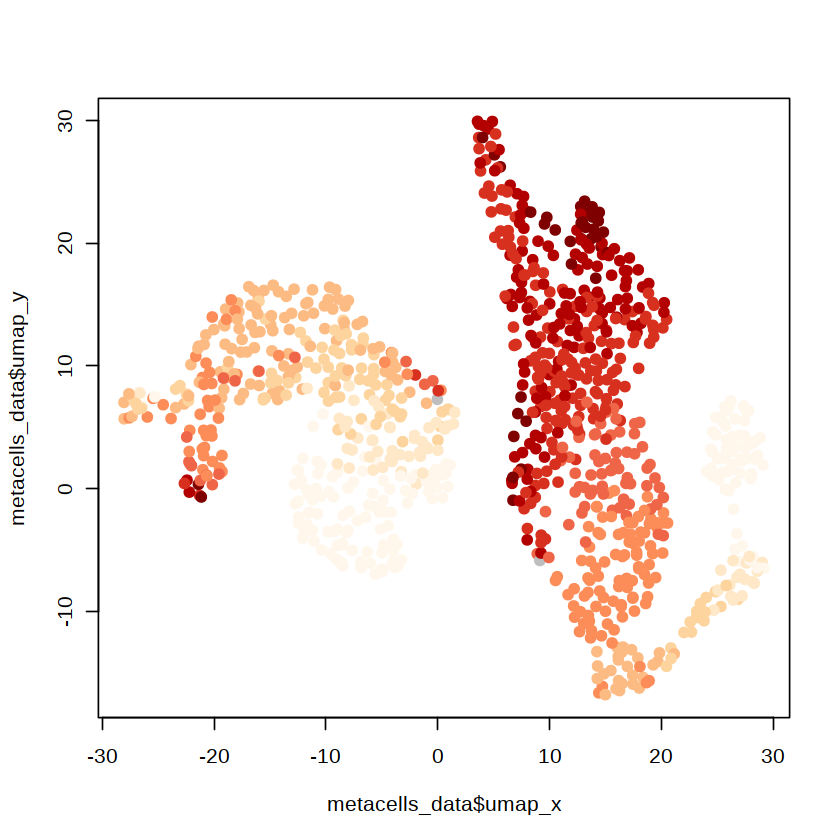

In [35]:
plot(metacells_data$umap_x, metacells_data$umap_y, col=ap1[rownames(metacells_data)], pch=19)

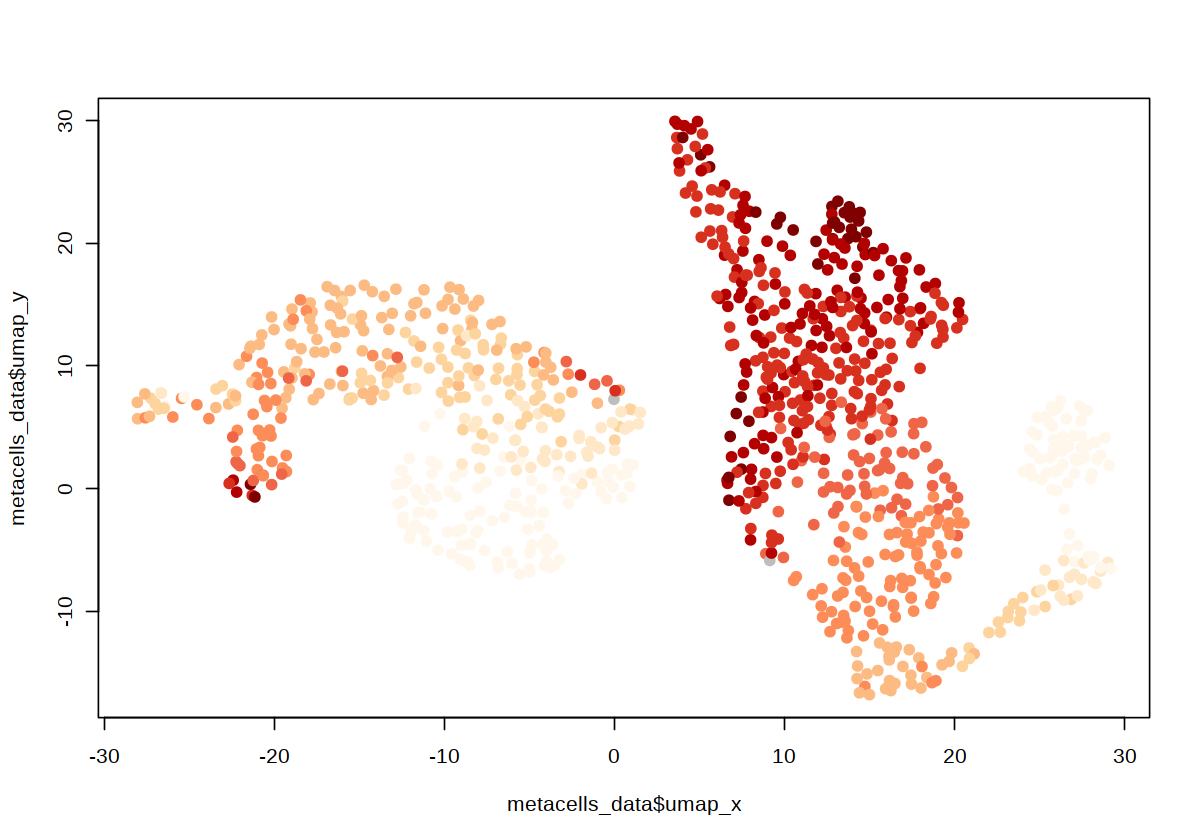

In [47]:
plot(metacells_data$umap_x, metacells_data$umap_y, col=ap2[rownames(metacells_data)], pch=19)

In [36]:
sum(!names(mc_xy$mc_x) %in% rownames(metacells_data))

[1] 2580

In [37]:
mc_xy$mc_x[!names(mc_xy$mc_x) %in% rownames(metacells_data)] = -20
mc_xy$mc_y[!names(mc_xy$mc_y) %in% rownames(metacells_data)] = -20

In [38]:
mean(metacells_data$umap_x, na.rm=T)
mean(metacells_data$umap_y, na.rm=T)

[1] 4.739323

[1] 5.441124

In [39]:
bu_mc_xy = mc_xy

In [40]:
bu_mc_xy$mc_x[478]/500
bu_mc_xy$mc_y[478]/500

478 
0.0328361

478 
-0.01895821

In [81]:
mc_xy$mc_x[478] = -20 #bu_mc_xy$mc_x[478]/500
mc_xy$mc_y[478] = -20 #bu_mc_xy$mc_y[478]/500

In [39]:
xy = mc2d_comp_cell_coord(
    mc_id = mc_id,
    graph_id =  mgraph_id,
    mgraph = mgraph@mgraph,
    cl_xy = mc_xy, symmetrize=symmetrize)

ERROR: Error in mc2d_comp_cell_coord(mc_id = mc_id, graph_id = mgraph_id, mgraph = mgraph@mgraph, : trying to get slot "mc" from an object of a basic class ("NULL") with no slots


In [49]:
scdb_add_mc2d(mc2d_id, tgMC2D(mc_id, mc_xy$mc_x, mc_xy$mc_y, xy$x, xy$y, mgraph@mgraph))

In [41]:
set_param("mcell_mc2d_cex", 0.8, package='metacell')

In [54]:
# TODO: pdf
# TODO: with MC / only cells
# TODO: lower K
mcell_mc2d_plot(show_mcid = F, mc2d_id, sc_cex=0.3, plot_edges = F)

ERROR: Error in mcell_mc2d_plot(show_mcid = F, mc2d_id, sc_cex = 0.3, plot_edges = F): missing mc2d when trying to plot, id oc_embexe_umap


In [70]:
# mcp_2d_height
# mcp_2d_width
tgconfig::set_param("mcell_mc2d_height", 750, "metacell")
tgconfig::set_param("mcp_2d_width", 750, "metacell")

ERROR: Error in tgconfig::set_param("mcp_2d_width", 750, "metacell"): parameter mcp_2d_width is not registered in package "metacell"


In [73]:
get_param("mcell_mc2d_cex", package = "metacell")

[1] 0.8

In [42]:
exe_mgraph = mgraph@mgraph[mgraph@mgraph$mc1 %in% rownames(metacells_data) & mgraph@mgraph$mc2 %in% rownames(metacells_data),]

In [43]:
tmp = table(mc@colors[unique(exe_mgraph$mc1)])

In [44]:
tibble::enframe(tmp) %>% rename(color=name) %>% left_join(mc@color_key)

Joining, by = "color"


color,value,group
<chr>,<table>,<chr>
#00FF15,102,Dppa3 low Dusp6 neg
#050505,140,Parietal Endoderm
#54DCE3,37,Wfdc2 Aldoc
#572E48,145,Yolk sac
#7B00FF,46,Dppa3 Hand1
#CF6191,16,Hypoblast-Anterior (Hhex/Lhx1/Cer1)
#D4EB63,281,Dusp6 not other
#F6BFCB,93,hypoblast
#FF00B7,80,DPPA3 TGM3


In [45]:
exclude = mc_xy$mc_x == -20 & mc_xy$mc_y == -20

In [53]:
length(cols)

[1] 3584

In [56]:
pdf("exe_manifold_by_time3.pdf", width = 10, height = 10)
plot_edges = T
min_edge_l=0
edge_w = 1
short_edge_w=0
mcp_2d_cex = 0.5
cols = mc@colors
cols[names(ap1)] = ap2

plot(metacells_data$umap_x, metacells_data$umap_y, col=cols[rownames(metacells_data)], pch=19, cex=0.8)
# plot(metacells_data$umap_x, metacells_data$umap_y, col=ap, pch=19, cex=0.8)
fr = exe_mgraph$mc1
to = exe_mgraph$mc2
if (plot_edges) {
    dx = mc_xy$mc_x[fr]-mc_xy$mc_x[to]
    dy = mc_xy$mc_y[fr]-mc_xy$mc_y[to]
    f = sqrt(dx*dx+dy*dy) > min_edge_l
    segments(mc_xy$mc_x[fr], mc_xy$mc_y[fr], mc_xy$mc_x[to], mc_xy$mc_y[to], 
                lwd=ifelse(f, edge_w, short_edge_w))
}
points(mc_xy$mc_x[!exclude], mc_xy$mc_y[!exclude], cex= 3*mcp_2d_cex, col="black", pch=21, bg=cols[!exclude])
dev.off()

png 
  2

In [83]:
sum(!exclude)

[1] 1003

In [102]:
library(plot3D)

Warning message:
"no DISPLAY variable so Tk is not available"


In [1]:
library(corrplot)

corrplot 0.92 loaded



In [10]:
library(shape)


Attaching package: 'shape'


The following object is masked from 'package:corrplot':

    colorlegend




In [16]:
library(RColorBrewer)

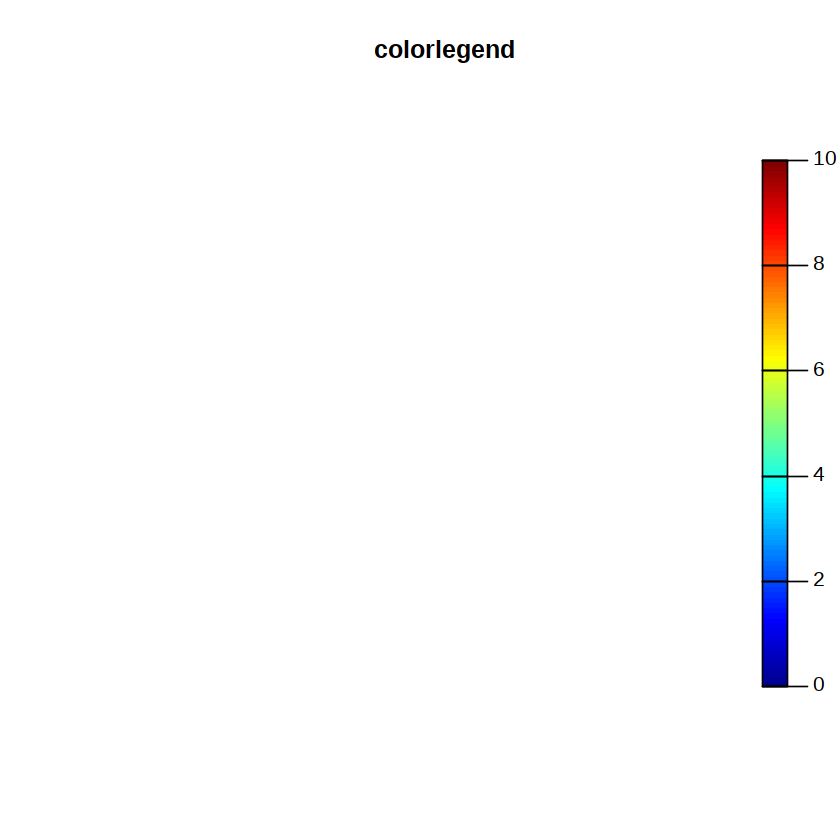

In [17]:
emptyplot(main = "colorlegend")
colorlegend(zlim = c(0, 10))

In [22]:
pdf("time_legend.pdf")
emptyplot(main = "colorlegend")
colorlegend(brewer.pal(9, "OrRd"), zlim=c(6,8.6))
dev.off()
#   at = NULL,
#   xlim = c(0, 1),
#   ylim = c(0, 1),
#   vertical = TRUE,
#   ratio.colbar = 0.4,
#   lim.segment = "auto",
#   align = c("c", "l", "r"),
#   addlabels = TRUE,
#   ...
# )

png 
  2

In [130]:
pdf("time_key.pdf")
colkey(col = "OrRd", breaks = 1:9)
dev.off()

ERROR: Error in check.breaks(breaks, col): must have one more break than col - suggest to use jet.col(8)


In [44]:
mcell_mc2d_plot = function(mc2d_id, legend_pos="topleft", plot_edges=T, min_edge_l=0, edge_w = 1, short_edge_w=0, show_mcid = T, cell_outline=F, colors=NULL, fig_fn = NULL, fn_suf="", sc_cex=1, filt_mc=NULL)
{
# 	mcp_2d_height = get_param("mcell_mc2d_height", package = "metacell")
# 	mcp_2d_width = get_param("mcell_mc2d_width", package = "metacell")
    mcp_2d_height = 1200
	mcp_2d_width = 1200
	mcp_2d_plot_key = get_param("mcell_mc2d_plot_key", package = "metacell")
	mcp_2d_cex = 0.5  # previously 1
	mcp_2d_legend_cex = get_param("mcell_mc2d_legend_cex", package = "metacell")

	mc2d = scdb_mc2d(mc2d_id)
	if(is.null(mc2d)) {
		stop("missing mc2d when trying to plot, id ", mc2d_id)
	}
	mc = scdb_mc(mc2d@mc_id)
	if(is.null(mc)) {
		stop("missing mc in mc2d object, id was, ", mc2d@mc_id)
	}
	if(!is.null(filt_mc)) {
		f_sc = filt_mc[mc@mc[names(mc2d@sc_x)]]
		mc2d@sc_x[!f_sc] = NA
		mc2d@sc_y[!f_sc] = NA
		mc2d@mc_x[!filt_mc] = NA
		mc2d@mc_y[!filt_mc] = NA
	}
	if(is.null(fig_fn)) {
		fig_fn = scfigs_fn(paste(mc2d_id,fn_suf,sep=""), ifelse(plot_edges, "2d_graph_proj", "2d_proj")) 
	}
# 	.plot_start(fig_fn, w=mcp_2d_width, h = mcp_2d_height)
	png(fig_fn, width = mcp_2d_width, height = mcp_2d_height)
	if(is.null(colors)) {
		cols = mc@colors
	} else {
		cols = colors
	}
	cols[is.na(cols)] = "gray"
	if(cell_outline) {
		plot(mc2d@sc_x, mc2d@sc_y, pch=21, bg=cols[mc@mc[names(mc2d@sc_x)]], cex=sc_cex, lwd=0.5)
	} else {
		plot(mc2d@sc_x, mc2d@sc_y, pch=19, col=cols[mc@mc[names(mc2d@sc_x)]], cex=sc_cex)
	}
	fr = mc2d@graph$mc1
	to = mc2d@graph$mc2
	if (plot_edges) {
		dx = mc2d@mc_x[fr]-mc2d@mc_x[to]
		dy = mc2d@mc_y[fr]-mc2d@mc_y[to]
		f = sqrt(dx*dx+dy*dy) > min_edge_l
		segments(mc2d@mc_x[fr], mc2d@mc_y[fr], mc2d@mc_x[to], mc2d@mc_y[to], 
					lwd=ifelse(f, edge_w, short_edge_w))
	}
	points(mc2d@mc_x, mc2d@mc_y, cex= 3*mcp_2d_cex, col="black", pch=21, bg=cols)
	if(show_mcid) {
		text(mc2d@mc_x, mc2d@mc_y, 1:length(mc2d@mc_x), cex=mcp_2d_cex)
	}

	if(nrow(mc@color_key)!=0 & mcp_2d_plot_key) {
		key = mc@color_key[ mc@color_key$color %in% mc@colors, ]
#		if(nrow(key!=0)) {
		if(!is.null(key) & is.vector(key) & nrow(key) != 0) {
#group	gene	color	priority	T_fold
		gmark = tapply(key$gene, key$group, paste, collapse=", ")
		gcol = unique(data.frame(col=key$color, group=key$group))
		rownames(gcol) = gcol$group
		if(is.vector(gmark)) {
			gmark = gmark[order(names(gmark))]
		}
		if(legend_pos == "panel") {
			dev.off()
			fig_fn = sub(".png", ".2d_proj_legend.png", fig_fn)
			png(fig_fn, width = 600, height= length(gmark)*40+400)
			plot.new()
			legend_pos = "topleft"
		}
		legend(legend_pos,
				legend=gsub("_", " ", paste0(names(gmark), ": ", gmark)),
				pch=19, cex=mcp_2d_legend_cex,
				col=as.character(gcol[names(gmark), 'col']), bty='n')
		}
	}

	dev.off()
}